# Sección C
## Resuelve el siguiente caso

## 1. ¿Deberian expandirse a Canada?

## 2. ¿Cuantos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodologia

Pista: Existen dos experimentos naturales, Canada y las tiendas que se encuentran lejos, utilizalos. 

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [333]:
def makedate(df):
    
    thedates = []
    l = df.shape
    l = l[0]
    """Devuelve una array con las fechas formadas"""
    
    for i in range(0, l):
        
        #day = int(df.iloc[i,3])
        day = 1
        month = int(df.iloc[i,2])
        year = int(df.iloc[i,1])
        
        thedate = datetime(year, month, day)
        
        thedate = thedate.strftime("%Y-%m") + "-01"
        thedate = thedate.split("-")
        thedate = datetime(int(thedate[0]), int(thedate[1]), int(thedate[2]))
        thedate = thedate.date()

        thedates.append(thedate)
    
    return thedates

   

In [334]:
def my_toNumeric(celd):
    
    celd = str(celd)
    celd = celd.replace(',','')
    numb = float(celd)
    #numb = float(celd)
    
    return numb    

veamos los datos

In [335]:
#Ventas en tiendas fisicas
bops_BM = pd.read_csv("bops_bm.csv")
bops_BM = bops_BM[['id(store)', 'year', 'month', 'week', 'usa', 'after', 'sales']]

#Ventas en linea
bops_on = pd.read_csv("bops_online.csv")
bops_on = bops_on[['id(DMA)', 'year', 'month', 'week', 'close', 'sales',]]


dicci = pd.read_excel("diccionarios.xlsx")

In [336]:
#dicci.head()

In [337]:
print(bops_BM['month'].unique())

[ 4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  2.  3. nan]


## Sales on B&M

In [338]:
bops_BM = bops_BM.dropna() 
bops_BM['sales'] = bops_BM['sales'].apply(my_toNumeric)
print(bops_BM["month"].unique())
bops_BM.head()

[ 4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  2.  3.]


,id(store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0


## Sales online

In [339]:
bops_on.head()

,id(DMA),year,month,week,close,sales
0,1,2011,4,17,1,"18,564"
1,1,2011,4,18,1,"30,883"
2,1,2011,5,19,1,"37,425"
3,1,2011,5,20,1,"32,563"
4,1,2011,5,21,1,"35,773"


In [340]:
bops_on = bops_on.dropna() 
bops_on['sales'] = bops_on['sales'].apply(my_toNumeric)
ventas_on = bops_on.copy()

## Vamos a ver el comportamiento de las ventas antes de bops y despues de bops, pero no solo en donde se aplico bops, sino tambien en los lugares en los que aún no se implementa

In [395]:
ventas = bops_BM.copy()

primer periodo 22 de abril al 11 de octubre
segundo periodo 11 de octubre al 11 de abril del 2012

# Decidi iniciar mi analisis comparando las ventas entre las tiendas de Estados Unidos y las tiendas de Canada, que como principal diferencia, es que en las tiendas de Canada no se ha implementado el programa BOPS, por lo que podríamos restarle o sumarle culpa a BOPS, sí el comportamiento de las ventas en las tiendas de Canada es diferente al de las tiendas de USA.



In [396]:
def showSales(df_ventas, country, after, close):
    if country == 'USA':
        country_ = 1
    elif country == "CAN":
        country_ = 0
    
    if after == 0:
        TIME = "BEFORE"
    else:
        TIME = "AFTER"
    
    ventasfisicas_antes_CAN = df_ventas[df_ventas['usa'] == country_]
    ventasfisicas_antes_CAN = ventasfisicas_antes_CAN[ventasfisicas_antes_CAN['after'] == after]
    print(ventasfisicas_antes_CAN["month"].unique())
    #ventasfisicas_antes_USA = ventasfisicas_antes_USA[ventasfisicas_antes_USA['month'] < 7]
    #ventasfisicas_antes = ventasfisicas_antes.sort_values(by =['week','month'], ascending=True)

    ventasfisicas_antes_CAN['date_'] = makedate(ventasfisicas_antes_CAN)

    mynew = ventasfisicas_antes_CAN.groupby(['date_'])['sales'].sum()
    mynew = pd.DataFrame(mynew)
    mynew = mynew.reset_index()
    mynew = mynew.sort_values(by =['date_'], ascending=True)
    mynew['date_'] = pd.to_datetime(mynew['date_'])
    
    tittulo = "SALES " + TIME + " BOPS IN " + country + " BY B&M"
    
    
    plt.figure(figsize=(12,6))
    plt.suptitle(tittulo, fontsize=15, fontweight='bold')
    plt.plot(mynew['date_'], mynew['sales'], linestyle = 'solid', linewidth=4, markersize = 10)
    plt.show()
    
    return plt.figure

   

[ 4.  5.  6.  7.  8.  9. 10.]


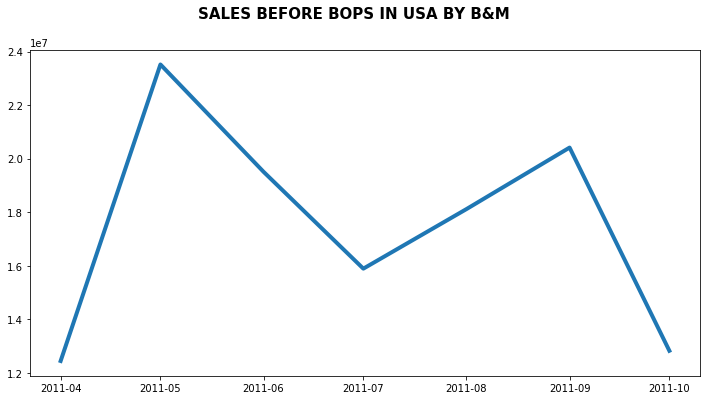

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [404]:
#datase, country, after, close
showSales(ventas, 'USA', 0, 0)

[10. 11. 12.  1.  2.  3.  4.]


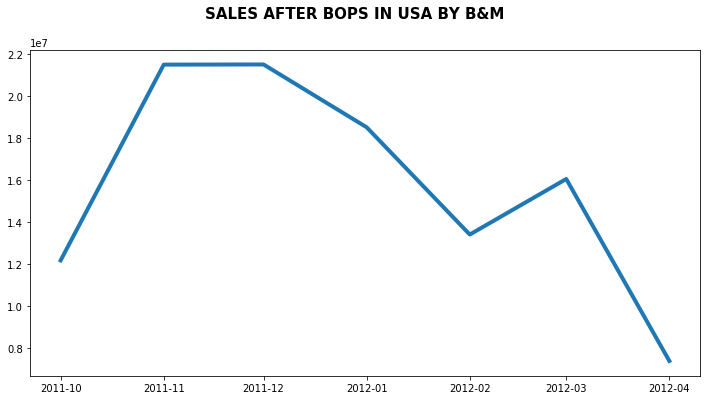

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [405]:
showSales(ventas, "USA", 1, 0)

[ 4.  5.  6.  7.  8.  9. 10.]


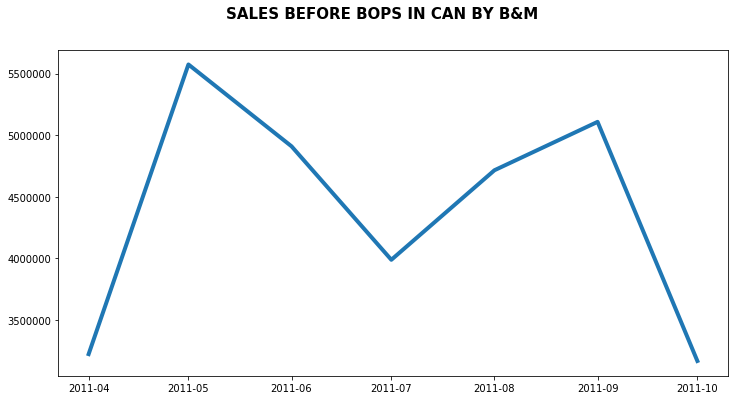

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [406]:
showSales(ventas, "CAN", 0, 0)

[10. 11. 12.  1.  2.  3.  4.]


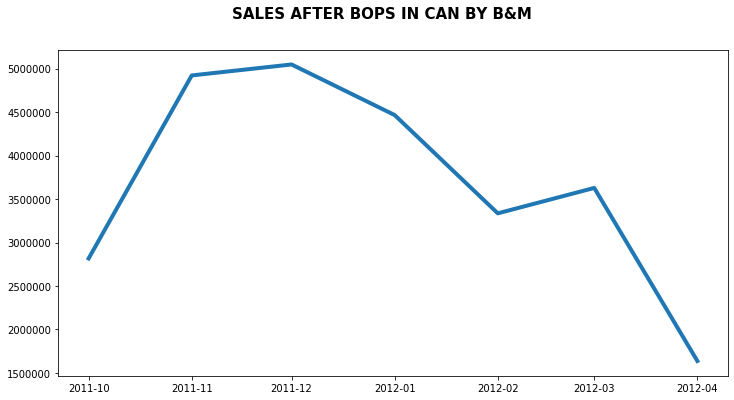

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [407]:
showSales(ventas, "CAN", 1, 0)

In [408]:
ventas_on.head()

,id(DMA),year,month,week,close,sales
0,1,2011,4,17,1,18564.0
1,1,2011,4,18,1,30883.0
2,1,2011,5,19,1,37425.0
3,1,2011,5,20,1,32563.0
4,1,2011,5,21,1,35773.0


In [418]:
def showSalesOn(ventas, close):
    
    if close == 1:
        com = " DMA IS WITHIN 50 MILES OF A STORE"
    else:
        com = " DMA IS NOT CLOSE"
        
    ventas['date_'] = makedate(ventas_on)
    ventas = ventas[ventas["close"] == close]
    
    
    mynew = ventas.groupby(['date_'])['sales'].sum()
    mynew = pd.DataFrame(mynew)
    mynew = mynew.reset_index()
    mynew = mynew.sort_values(by =['date_'], ascending=True)
    mynew['date_'] = pd.to_datetime(mynew['date_'])
    
    title_ = "SALES ONLINE" + com
    plt.figure(figsize=(12,6))
    plt.suptitle(title_, fontsize=15, fontweight='bold')
    plt.plot(mynew['date_'], mynew['sales'], linestyle = 'solid', marker='o', linewidth=4, markersize = 10)
    plt.grid()
    print(mynew['sales'].max())
   
    
    return plt.figure




10398055.0


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

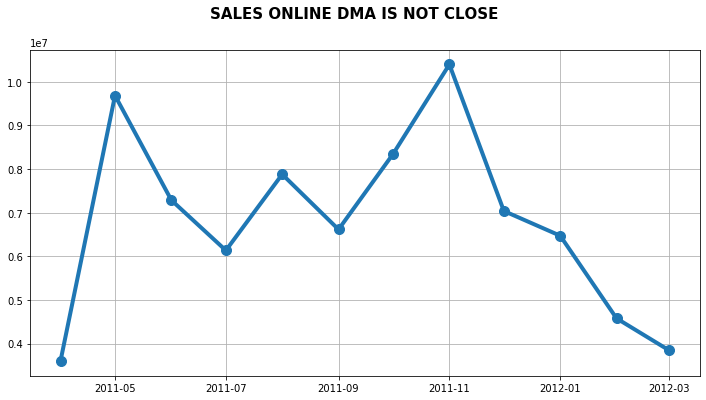

In [420]:
showSalesOn(bops_on, 0)

7982360.0


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

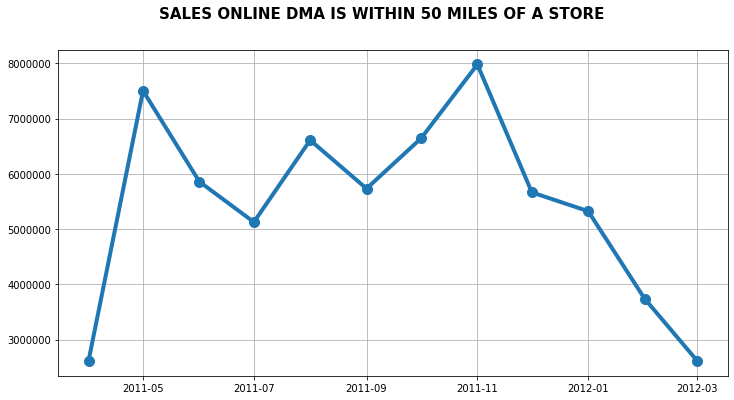

In [421]:
showSalesOn(bops_on, 1.0)

# En conclusión, el programa BOPS no estaba teniendo el resultado esperado, aparentemente en el arranque del programa BOPS se tiene una alza en las ventas, pero esto también ocurre en las tiendas de Canada y en las ventas en linea en las que el comprador no vive cerca de una tienda, entonces no podemos adjuticar esa alza al programa  BOPS.  

# Considero que no deberian aplicar el programa BOPS en Canada, antes de revisarlo.